# CRISP-DM

**CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/1200px-CRISP-DM_Process_Diagram.png)

# Recap: OOP

To get a better understanding of the Scikit-learn API, we need to
understand the main concepts behind Object Oriented
Programming.

Here is an example for **K-Nearest Neighbors** implementation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class KNearestNeighbor:
  """ a kNN classifier with arbitrary distance """

  def __init__(self):
    """
    Initializing the KNN object.
    """
    self.X_train_ = None
    self.y_train_ = None

  def fit(self, X_train, y_train):
    """
    Inputs:
    - X_train: A numpy array of shape (num_train, D)
    - y_train: A numpy array of shape (N,) containing the training labels
    """
    self.X_train_ = X_train
    self.y_train_ = y_train
    return self


  def predict(self, X_test, k=1):
    """
    This method fits the data and predicts the labels for the given test data.
    For k-nearest neighbors fitting (training) is just
    memorizing the training data.
    Inputs:
    - X_test: A numpy array or pandas DataFrame of shape (num_test, D)
    - k: The number of nearest neighbors.
    - num_loops: number of for loop implementation.

    Returns:
    - y: A numpy array or pandas Series of shape (num_test,) containing predicted labels
    """
    dists = self.compute_distances(X_test)
    return self.predict_labels(dists, k=k)

  def compute_distances(self, X_test):
    """
    Compute the distance between each test point in X_test and each training point
    in self.X_train using a nested loop over both the training data and the
    test data.

    Inputs:
    - X_test: A numpy array or pandas DataFrame of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    X_train = self.X_train_
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        dists[i, :] = (X_train != X_test[i,:]).sum(axis=1)
    return dists

  def predict_labels(self, dists, k=1):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance between the ith test point and the jth training point.

    Returns:
    - y: A numpy array or pandas Series of shape (num_test,) containing the
    predicted labels for the test data
    """
    def majority_class(y): return y.value_counts().index[0]

    if k == 1:
      y_pred = self.y_train_[dists.argmin(axis=1)]
    else:
      y_pred = []
      for i in range(dists.shape[0]):
        closest_k = np.argsort(dists[i, :])[:k]
        closest_y = self.y_train_[closest_k]
        y_pred.append(majority_class(closest_y))
    return np.array(y_pred)

Now let's see how the model performs on simple 2D data.

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
    n_classes=2,
    class_sep=0.3
)

In [7]:
X.shape

(100, 2)

In [8]:
def plot_data(X, y):
  """Helper function to view to data points."""
  for class_id in np.unique(y):
    mask = y == class_id
    plt.plot(X[mask, 0], X[mask, 1], 'o', label=f'class {class_id}')
  plt.legend();

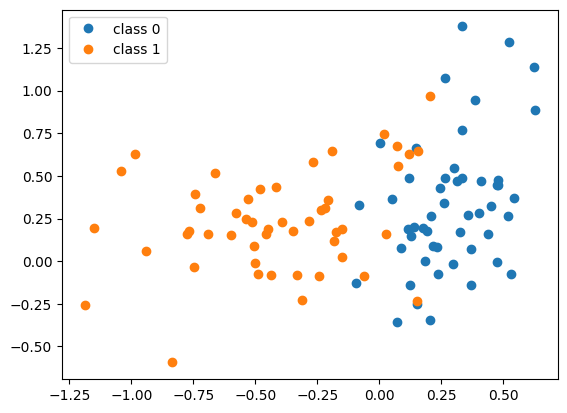

In [9]:
plot_data(X, y)

We need to initialize a model object, which will be used to train (fit) on the given data.

In [10]:
model = KNearestNeighbor()
model.fit(X, y)

At this point the model is trained and we can test its performance. For simplicity, we use the training data, hoping to get higher scores (at least better than **random guessing**).

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X)
acc = accuracy_score(y_pred, y)
print(f'Train accuracy: {acc}')

Train accuracy: 1.0


# Sklearn Estimator API

* Below is an overview of the scikit-learn estimator API, which is used for implementing classification and regression models/algorithms.

* The score method simply runs **predict** on the features (X) internally and then computes the performance by comparing the predicted targets to the true targets y.

* In the case of classification models, the score method computes the classification accuracy (in the range [0, 1]) -- i.e., the proportion of correctly predicted labels.

* In the case of regression models, the score method computes the coefficient of determination (
$R^2$).



Here is the general template for Sklearn's estimators.

```python
class SupervisedEstimator(...):
    
    def __init__(self, hyperparam_1, ...):
        self.hyperparm_1
        ...
    
    def fit(self, X, y):
        ...
        self.fit_attribute_
        return self
    
    def predict(self, X):
        ...
        return y_pred
    
    def score(self, X, y):
        ...
        return score

    def _private_method(self):
        ...
```

The graphic below summarizes the useage of the SupervisedEstimator API that scikit-learn uses for implementing classification and regression algorithms/models.

![](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch04/images/04_02.png?raw=true)

This is an example code for using sklearn's ``KNeighborsClassifier``.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_model = KNeighborsClassifier(n_neighbors=1)
sklearn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [13]:
sklearn_y_pred = sklearn_model.predict(X)
sklearn_acc = accuracy_score(sklearn_y_pred, y)
print(f'Train accuracy: {sklearn_acc}')

Train accuracy: 1.0


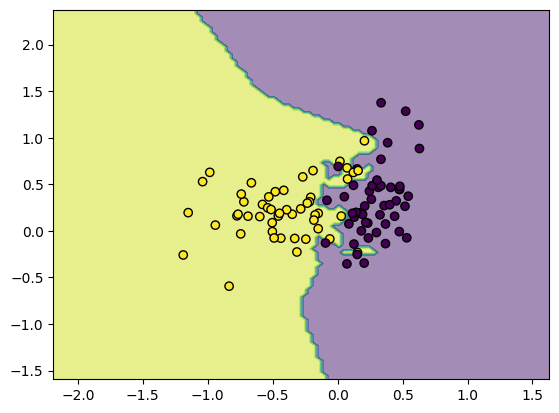

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
     sklearn_model, X, alpha=0.5, response_method='predict'
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

plt.show()

Let's revisit the Iris dataset for more realistic example.

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris['data'], iris['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Now let's split the dataset into train, val, test chunks, as it is usually done to better verify the quality of our model.

In [17]:
from sklearn.model_selection import train_test_split


X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.2,
                         shuffle=True, random_state=123)



In [18]:
print(X_temp.shape, X_test.shape)

(120, 4) (30, 4)


In [19]:

X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123)

print('Train size', X_train.shape, 'class proportions', np.bincount(y_train))
print('Valid size', X_valid.shape, 'class proportions', np.bincount(y_valid))
print('Test size', X_test.shape, 'class proportions', np.bincount(y_test))

Train size (96, 4) class proportions [30 36 30]
Valid size (24, 4) class proportions [7 8 9]
Test size (30, 4) class proportions [13  6 11]


# Data Scaling

Sometimes we need to perform certain transformations on our data, before feeding to the model. For example, there are several algorithms, which work much better (are more robust, numerically stable, and converge faster) if the data is centered and has a smaller range.

There are many different ways for scaling features; here, we only cover 2 of the most common "normalization" schemes: min-max scaling and z-score standardization.





### Normalization -- Min-max scaling

- Min-max scaling squashes the features into a [0, 1] range, which can be achieved via the following equation for a single input $i$:

$$x^{[i]}_{\text{norm}} = \frac{x^{[i]} - x_{\text{min}} }{ x_{\text{max}} - x_{\text{min}} }$$

- Below is an example of how we can implement and apply min-max scaling on 6 data instances given a 1D input vector (1 feature) via NumPy.

In [ ]:
x = np.arange(6).astype(float)
x

In [ ]:
x_norm = (x - x.min()) / (x.max() - x.min())
x_norm

### Standardization

- Z-score standardization is a useful standardization scheme if we are working with certain optimization methods (e.g., gradient descent, later in this course).
- After standardizing a feature, it will have the properties of a standard normal distribution, that is, unit variance and zero mean ($N(\mu=0, \sigma^2=1)$); however, this does not transform a feature from not following a normal distribution to a normal distributed one.
- The formula for standardizing a feature is shown below, for a single data point $x^{[i]}$.

$$x^{[i]}_{\text{std}} = \frac{x^{[i]} - \mu_x }{ \sigma_{x} }$$

In [ ]:
x = np.arange(6).astype(float)
x

In [ ]:
x_std = (x - x.mean()) / x.std()
x_std

- Conveniently, NumPy and Pandas both implement a `std` method, which computes the standard devation.
- Note the different results shown below.

In [ ]:
df = pd.DataFrame([1, 2, 1, 2, 3, 4])
df[0].std()

In [ ]:
df[0].values.std()

- The results differ because Pandas computes the "sample" standard deviation ($s_x$), whereas NumPy computes the "population" standard deviation ($\sigma_x$).

$$s_x = \sqrt{ \frac{1}{n-1} \sum^{n}_{i=1} (x^{[i]} - \bar{x})^2 }$$

$$\sigma_x = \sqrt{ \frac{1}{n} \sum^{n}_{i=1} (x^{[i]} - \mu_x)^2 }$$

- In the context of machine learning, since we are typically working with large datasets, we typically don't care about Bessel's correction (subtracting one degree of freedom in the denominator).
- Further, the goal here is not to model a particular distribution or estimate distribution parameters accurately; however, if you like, you can remove the extra degree of freedom via NumPy's `ddof` parameters -- it's not necessary in practice though.

In [ ]:
df[0].values.std(ddof=1)

- A concept that is very important though is how we use the estimated normalization parameters (e.g., mean and standard deviation in z-score standardization).
- In particular, it is important that we re-use the parameters estimated from the training set to transfrom validation and test sets -- re-estimating the parameters is a common "beginner-mistake" which is why we discuss it in more detail.

In [ ]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

X_train_std = (X_train - mu) / sigma
X_valid_std = (X_valid - mu) / sigma
X_test_std = (X_test - mu) / sigma

- Again, if we standardize the training dataset, we need to keep the parameters (mean and standard deviation for each feature). Then, we’d use these parameters to transform our test data and any future data later on
- Let’s assume we have a simple training set consisting of 3 samples with 1 feature column (let’s call the feature column “length in cm”):

- example1: 10 cm -> class 2
- example2: 20 cm -> class 2
- example3: 30 cm -> class 1

Given the data above, we estimate the following parameters from this training set:

- mean: 20
- standard deviation: 8.2

If we use these parameters to standardize the same dataset, we get the following z-score values:

- example1: -1.21 -> class 2
- example2: 0 -> class 2
- example3: 1.21 -> class 1

Now, let’s say our model has learned the following hypotheses (*rule*): It classifies samples with a standardized length value < 0.6 as class 2 (and class 1 otherwise). So far so good. Now, let’s imagine we have 3 new unlabeled data points that you want to classify.

- example4: 5 cm -> class ?
- example5: 6 cm -> class ?
- example6: 7 cm -> class ?

If we look at the non-standardized "length in cm" values in the training datast, it is intuitive to say that all of these examples (5, 6, and 7) are likely belonging to class 2  because they are smaller than anything in the training set. However, if we standardize these by re-computing the standard deviation and and mean from the new data, we will get similar values as before (i.e., properties of a standard normal distribtion) in the training set and our classifier would (probably incorrectly) assign the “class 2” label to the samples 4 and 5.

- example5: -1.21 -> class 2
- example6: 0 -> class 2
- example7: 1.21 -> class 1

However, if we use the parameters from the "training set standardization," we will get the following standardized values

- example5: -18.37
- example6: -17.15
- example7: -15.92

Note that these values are more negative than the value of example1 in the original training set, which makes much more sense now!

# Sklearn Transformer API

The transformer API in scikit-learn is very similar to the estimator API; the main difference is that transformers are typically **"unsupervised,"** meaning, they don't make use of class labels or target values.

![](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch04/images/04_01.png?raw=true)

Typical examples of transformers in scikit-learn are the MinMaxScaler and the StandardScaler, which can be used to perform min-max scaling and z-score standardization as discussed earlier.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardSler


scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

## Feature Transformation, Extraction, and Selection

We have already covered very simple cases of feature transformation, i.e., normalization, that is, min-max scaling and standardization. There are many other cases, but an extensive coverage of feature preprocessing is beyond the scope of a machine learning class. However, we will will look at some popular feature selection and feature extraction techniques later in this course.

# Sklearn Pipelines

- Scikit-learn pipelines are an extremely convenient and powerful concept -- one of the things that sets scikit-learn apart from other machine learning libraries.
- Pipelines basically let us define a series of preprocessing steps together with fitting an estimator.
- Pipelines will automatically take care of pitfalls like estimating feature scaling parameters from the training set and applying those to scale new data (which we discussed earlier in the context of z-score standardization).
- Below is an visualization of how pipelines work.

![](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/images/06_01.png?raw=true)

- Below is an example pipeline that combines the feature scaling step with the *k*NN classifier.

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer


pipe = make_pipeline(StandardScaler(),
                     FunctionTransformer(func=lambda x: x ** 3),
                     KNeighborsClassifier(n_neighbors=3))

In [22]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x790ba92dc7c0>)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [23]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

- As you can see above, the Pipeline itself follows the scikit-learn estimator API.

(Also see the [FunctionTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html) in scikit-learn, which allows creating a transformer class from an arbitrary callable or function.)

## Intro Model Selection -- Pipelines and Grid Search

- In machine learning practice, we often need to experiment with an machine learning algorithm's hyperparameters to find a good setting.
- The process of tuning hyperparameters and comparing and selecting the resulting models is also called "model selection" (in contrast to "algorithm selection").
- We will cover topics such as "model selection" and "algorithm selection" in more detail later in this course.
- For now, we are introducing the simplest way of performing model selection: using the "holdout method."
- In the holdout method, we split a dataset into 3 subsets: a training, a validation, and a test dataset.
- To avoid biasing the estimate of the generalization performance, we only want to use the test dataset once, which is why we use the validation dataset for hyperparameter tuning (model selection).
- Here, the validation dataset serves as an estimate of the generalization performance, too, but it becomes more biased than the final estimate on the test data because of its repeated re-use during model selection.


![](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/images/06_02.png?raw=true)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier())

params = {'kneighborsclassifier__n_neighbors': [1, 3, 5],
          'kneighborsclassifier__p': [1, 2]}


grid = GridSearchCV(pipe,
                    param_grid=params)

grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5],
                         'kneighborsclassifier__p': [1, 2]})

In [26]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001979,0.000550,0.003470,0.001057,1,1,"{'kneighborsclassifier__n_neighbors': 1, 'knei...",0.90,0.894737,1.0,0.894737,0.947368,0.927368,0.041362,4
1,0.001609,0.000057,0.002799,0.000110,1,2,"{'kneighborsclassifier__n_neighbors': 1, 'knei...",0.90,0.894737,1.0,0.842105,0.947368,0.916842,0.053301,6
2,0.001569,0.000023,0.002712,0.000044,3,1,"{'kneighborsclassifier__n_neighbors': 3, 'knei...",0.95,0.947368,1.0,0.894737,0.947368,0.947895,0.033304,1
3,0.001557,0.000030,0.002926,0.000449,3,2,"{'kneighborsclassifier__n_neighbors': 3, 'knei...",0.90,0.894737,1.0,0.894737,0.947368,0.927368,0.041362,4
4,0.001641,0.000117,0.002680,0.000028,5,1,"{'kneighborsclassifier__n_neighbors': 5, 'knei...",0.95,0.947368,1.0,0.894737,0.947368,0.947895,0.033304,1
5,0.001541,0.000017,0.002701,0.000076,5,2,"{'kneighborsclassifier__n_neighbors': 5, 'knei...",0.95,0.947368,1.0,0.842105,0.947368,0.937368,0.051686,3


In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.9478947368421053
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1}


In [ ]:
grid.predict(X_test)

In [28]:
grid.best_estimator_.predict(X_test)

array([2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0])

In [ ]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f%%' % (clf.score(X_test, y_test)*100))

# Example: K-nearest neighbours

Consider this simple example.

In [12]:
data = pd.DataFrame({
    'mass':   [4., 5., 5., 5., 6., 7., 11., 11., 13., 13.],
    'height': [2., 1., 2., 3., 2., 4., 8.,  10., 8.,  10.],
    'label':  ['cat']*5 + ['dog']*5
},
    columns = ['mass', 'height', 'label'] # maintains column order
)
data

,mass,height,label
0,4.0,2.0,cat
1,5.0,1.0,cat
2,5.0,2.0,cat
3,5.0,3.0,cat
4,6.0,2.0,cat
5,7.0,4.0,dog
6,11.0,8.0,dog
7,11.0,10.0,dog
8,13.0,8.0,dog
9,13.0,10.0,dog


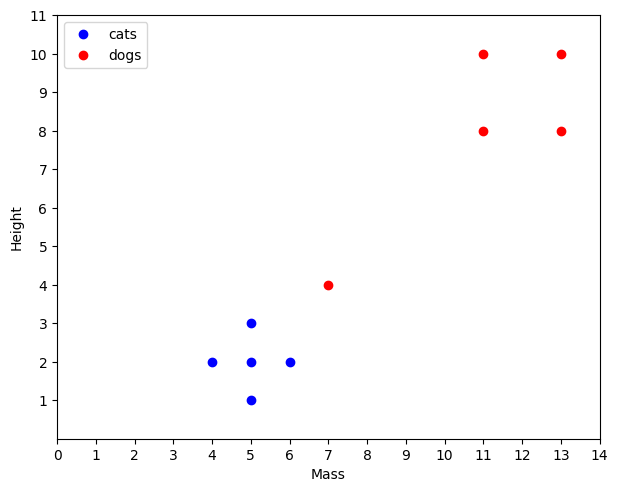

In [13]:
def plot_cats_vs_dogs(data):
    # Specify figure parameters
    fig, ax = plt.subplots(figsize=(7, 5.5))
    # Data to plot
    ax.plot(data.loc[data.label == 'cat', 'mass'],
            data.loc[data.label == 'cat', 'height'], 'bo', label='cats')
    ax.plot(data.loc[data.label == 'dog', 'mass'],
            data.loc[data.label == 'dog', 'height'], 'ro', label='dogs')

    # Specify axes parameters
    ax.set_xticks(list(range(0, 15)))
    ax.set_yticks(list(range(1, 12)))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 11)

    # Axis labels
    ax.set_xlabel('Mass')
    ax.set_ylabel('Height')

    return ax

# Show the plot inline
plot_cats_vs_dogs(data)
plt.legend(markerscale=1, frameon=True)
plt.show()

K-nearest neighbours algorithm makes decision for each point based on nearest neighbours' classes. We can visualize decision boundaries to compare classification with different K values.

We have this unknown point (marked with cross). In which class does it belong using 1-NN, or 3-NN...?

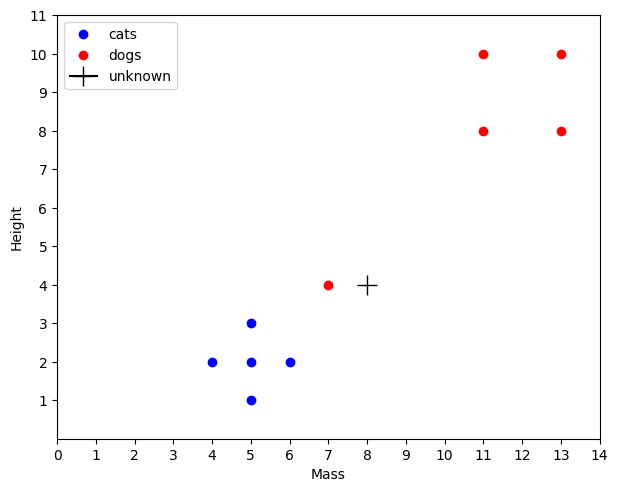

In [14]:
plot_cats_vs_dogs(data)
plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
plt.legend(markerscale=1, frameon=True)
plt.show()

Now let's see what kind of decision boundaries we get for different number of neighbors, here we try $k=\{1, 3, 5, 7, 9\}$ values.

In [15]:
def plot_decision_boundaries(model, data):
      X_train = data.iloc[:, :2]
      X_train.columns = ['x', 'y']
      y_train = data.label

      model = model.fit(X_train, y_train)

      disp = DecisionBoundaryDisplay.from_estimator(
      model, X_train, alpha=0.5, response_method='predict'
      )
      disp.ax_.scatter(data.iloc[:, 0], data.iloc[:, 1],
                      c=data.iloc[:, 2].map({'cat': 0, 'dog': 1}),
                      edgecolor="k"
                      )

In [16]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i)
    plot_decision_boundaries(model=model, data=data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

NameError: name 'KNeighborsClassifier' is not defined

In the KNeighborsClassifier, the default metric is minkowski, and with p=2 it is equivalent to the standard Euclidean distance. However, we can also use some other distance measures.

In [ ]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')   # metric=minkowski, p=1
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()

We can use weights to weight each neighbour's vote inversely to its distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [ ]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()


Now, let's use distance weighting and Manhattan distance instead of Euclidean distance.

In [ ]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i,
                                 weights='distance',
                                 metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{} neighbours'.format(i))
    plt.show()